# Test Machine Learning algorithms

In [9]:
# load libraries that will be used
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier

from mpl_toolkits.basemap import Basemap

# make figures better:
font = {'weight':'normal','size':20}
plt.rc('font', **font)
plt.rc('figure', figsize=(9.0, 6.0))
plt.rc('xtick.major', pad=10) # xticks too close to border!
plt.style.use('ggplot')

#print(plt.style.available)

In [55]:
# unzip and load data into memory
%run load.py

df_countries => rows: 10; columns: 7
df_country_demographics => rows: 420; columns: 5
df_user_sessions => rows: 10567737; columns: 6
df_train => rows: 213451; columns: 16
df_test => rows: 62096; columns: 15
df_users => rows: 275547; columns: 16


In [56]:
# clean up data, slit and format dates
%run transform.py
transform(df_users)
X_train, X_test, y_train, y_test = features[len(df_train):], labels[len(df_train):], features[-len(df_test):], labels[-len(df_test):]


NameError: name 'labels' is not defined

In [58]:
dataframe = df_users
# setup ml structure
labels = dataframe['country_destination'].values

# date_account_created
dataframe['date_account_created'] = pd.to_datetime(dataframe.date_account_created)
dataframe['creation_year'] = dataframe.date_account_created.dt.year
dataframe['creation_month'] = dataframe.date_account_created.dt.month
dataframe['creation_day'] = dataframe.date_account_created.dt.day

# timestamp_first_active
dataframe['date_first_active'] = pd.to_datetime((dataframe.timestamp_first_active // 1000000), format='%Y%m%d')
dataframe['active_year'] = dataframe.date_first_active.dt.year
dataframe['active_month'] = dataframe.date_first_active.dt.month
dataframe['active_day'] = dataframe.date_first_active.dt.day

# cleanup
# date_first_booking isn't populated in the test set so this feature can't be used
features = dataframe.drop(['id','country_destination','date_account_created','timestamp_first_active','date_first_active','date_first_booking'], axis=1)
features.replace("-unknown-", np.nan, inplace = True)
features = features.fillna(-1)

In [66]:
X_train, X_test, y_train, y_test = features[0:len(df_train)], labels[0:len(df_train)], features[len(df_test):], labels[len(df_test):]

In [69]:
len(df_train)

213451

In [70]:
len(df_test)

62096

In [67]:
X_train.shape, y_train.shape

((213451, 17), (213451, 17))

In [68]:
X_test.shape,  y_test.shape

((213451L,), (213451L,))

You have to do some encoding before using fit. As it was told fit() does not accept Strings but you solve this.

In [44]:
# encoding
encoded_features_train = pd.get_dummies(features_train)
encoded_features_train.head()

,age,signup_flow,creation_year,creation_month,creation_day,active_year,active_month,active_day,gender_-1,gender_FEMALE,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,-1,0,2010,6,28,2009,3,19,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38,0,2011,5,25,2009,5,23,0,0,...,0,0,0,0,0,0,0,0,0,0
2,56,3,2010,9,28,2009,6,9,0,1,...,0,0,0,0,0,0,0,0,0,0
3,42,0,2011,12,5,2009,10,31,0,1,...,0,0,0,0,0,0,0,0,0,0
4,41,0,2010,9,14,2009,12,8,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# assign
X_train, y_train = encoded_features_train, labels_train

In [39]:
# Fit regression model
regr_1 = DecisionTreeClassifier(max_depth=2)
regr_2 = DecisionTreeClassifier(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

ValueError: x and y must be the same size

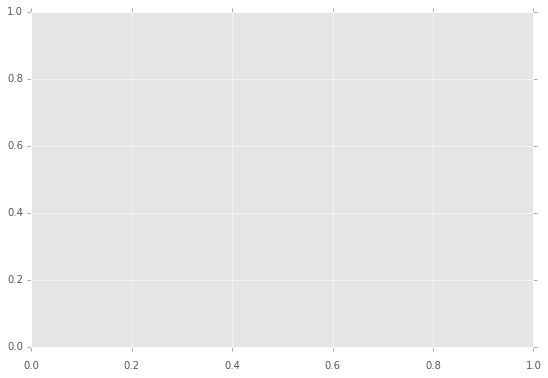

In [26]:
# Plot the results
plt.figure()
plt.scatter(X_train, y_train, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [6]:
encoded_features = pd.get_dummies(features)

In [7]:
encoded_features.head()

,age,signup_flow,creation_year,creation_month,creation_day,active_year,active_month,active_day,gender_-1,gender_FEMALE,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,-1,0,2010,6,28,2009,3,19,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38,0,2011,5,25,2009,5,23,0,0,...,0,0,0,0,0,0,0,0,0,0
2,56,3,2010,9,28,2009,6,9,0,1,...,0,0,0,0,0,0,0,0,0,0
3,42,0,2011,12,5,2009,10,31,0,1,...,0,0,0,0,0,0,0,0,0,0
4,41,0,2010,9,14,2009,12,8,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# train/test dataset 70/30 split 
X, y, feature_names, target_name = encoded_features, target, list(encoded_features),list(target)

from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
np.random.seed(0)

## Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [ ]:
from sklearn.externals.six import StringIO
import pydot
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# Feauture Scaling

$x' = x - x_{min} / x_{max} - x_{min}$